In [1]:
from locscale.include.emmer.pdb.pdb_utils import get_bfactors, get_coordinates
from locscale.include.emmer.pdb.pdb_tools import get_atomic_bfactor_window
from locscale.include.emmer.ndimage.map_tools import get_atomic_model_mask
from locscale.include.emmer.ndimage.map_utils import load_map, convert_mrc_to_pdb_position
import numpy as np
import random
from tqdm import tqdm
atomic_model_refined_path = "/home/abharadwaj1/papers/elife_paper/figure_information/inputs/emd_3061/model_based/processing_files/5a63_shifted_servalcat_refined_shifted_bfactors.pdb"
pseudo_model_refined_path = "/home/abharadwaj1/papers/elife_paper/figure_information/inputs/emd_3061/model_free_with_nomask/processing_files/EMD_3061_unfiltered_confidenceMap_gradient_pseudomodel_proper_element_composition_shifted_bfactors.pdb"
emmap_path = "/home/abharadwaj1/papers/elife_paper/figure_information/figure_data/figure_1/map_data/EMD_3061_unfiltered.mrc"

atomic_model_mask_path = get_atomic_model_mask(emmap_path, atomic_model_refined_path)
atomic_model_mask, apix = load_map(atomic_model_mask_path)

# extract 1000 random points from the atomic model mask 
atomic_coordinates = get_coordinates(atomic_model_refined_path)
random_centers = random.sample(atomic_coordinates, 1000)


# get the b-factors of the atomic model 
bfactors_atomic = []
bfactors_pseudo = []
for atomic_position in tqdm(random_centers):
    atomic_average_bfactor = get_atomic_bfactor_window(atomic_model_refined_path, atomic_position=atomic_position, window_size_A=25)
    pseudo_average_bfactor = get_atomic_bfactor_window(pseudo_model_refined_path, atomic_position=atomic_position, window_size_A=25)
    bfactors_atomic.append(atomic_average_bfactor)
    bfactors_pseudo.append(pseudo_average_bfactor)

bfactors_atomic = np.array(bfactors_atomic)
bfactors_pseudo = np.array(bfactors_pseudo)

100%|██████████| 1000/1000 [00:51<00:00, 19.33it/s]


/home/everybody/anaconda3/envs/locscale_dev/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<>:4: DeprecationWarning: invalid escape sequence \A
<>:5: DeprecationWarning: invalid escape sequence \A
<>:4: DeprecationWarning: invalid escape sequence \A
<>:5: DeprecationWarning: invalid escape sequence \A
<ipython-input-2-4f62a7de0f72>:4: DeprecationWarning: invalid escape sequence \A
  x_label = "Average Local Atomic B-factors $(\AA^2)$"
<ipython-input-2-4f62a7de0f72>:5: DeprecationWarning: invalid escape sequence \A
  y_label = "Average Local Pseudoatomic B-factors $(\AA^2)$"


Function name:  plot_correlations
Function name:  plot_correlations_multiple_single_plot
Function name:  plot_correlations_multiple
Function name:  plot_linear_regression
Function name:  plot_radial_profile_seaborn
Function name:  pretty_lineplot_XY
Function name:  pretty_lineplot_multiple_fsc_curves
Function name:  pretty_violinplots
Function name:  pretty_boxplots
Function name:  pretty_plot_radial_profile
Function name:  pretty_plot_continious_radial_profiles
Passed arguments:
x_array = ...
y_array = ...
x_label = Average Local Atomic B-factors $(\AA^2)$
y_label = Average Local Pseudoatomic B-factors $(\AA^2)$
title_text = 
Default arguments:
scatter = False
figsize_cm = (14, 8)
font = Helvetica
fontsize = 10
fontscale = 1
hue = None
find_correlation = True
alpha = 0.3
filepath = None


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


<Figure size 944.882x944.882 with 0 Axes>

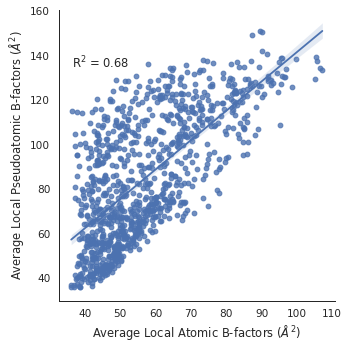

In [2]:
from plot_utils import plot_correlations
x_array = bfactors_atomic
y_array = bfactors_pseudo
x_label = "Average Local Atomic B-factors $(\AA^2)$"
y_label = "Average Local Pseudoatomic B-factors $(\AA^2)$"
title = ""
filepath = "/home/abharadwaj1/papers/elife_paper/figure_information/outputs/figure_1e.eps"
fig = plot_correlations(x_array, y_array, x_label, y_label, title, 
                        figsize_cm=(4,4), fontscale=1.2, scatter=True, filepath=filepath)